In [4]:
from Bio import SeqIO ,Entrez

In [6]:
from Bio.SeqUtils import gc_fraction, molecular_weight

In [7]:
from matplotlib import pyplot as plt

In [8]:

recs = list(SeqIO.parse("Ayg99.fasta" , "fasta"))
recs

[SeqRecord(seq=Seq('TTGACCAATGACCCCGGTTCCGGTTTCGCCGCAGTGTGGAATGCCGTCGTCGCT...TCG'), id='NC_008611.1', name='NC_008611.1', description='NC_008611.1 Mycobacterium ulcerans Agy99, complete sequence', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCCAGCACCGAGCGTGTTTGTCGGCCTGGAACTCGACACCAACAGTTACACC...GAT'), id='NC_005916.1', name='NC_005916.1', description='NC_005916.1 Mycobacterium ulcerans Agy99 plasmid pMUM001, complete sequence', dbxrefs=[])]

In [9]:
Ayg99 = recs[0].seq

In [10]:
Ayg99

Seq('TTGACCAATGACCCCGGTTCCGGTTTCGCCGCAGTGTGGAATGCCGTCGTCGCT...TCG')

In [11]:
print(f" Genome of Ayg99 Consist of {len(Ayg99)} nuclotides")

 Genome of Ayg99 Consist of 5631606 nuclotides


In [12]:
molecular_weight(Ayg99)

1740059193.2067

In [13]:
print(f"GC conten of Covid-19: {round(gc_fraction(Ayg99)*100 , 2)}")

GC conten of Covid-19: 65.47


In [14]:
count_nuc = {
    "A" : Ayg99.count("A"),
    "T" : Ayg99.count("T"),
    "C" : Ayg99.count("C"),
    "G" : Ayg99.count("G")
}

In [15]:
count_nuc

{'A': 976432, 'T': 968010, 'C': 1850482, 'G': 1836682}

Text(0.5, 1.0, 'Amount of Nucleotide')

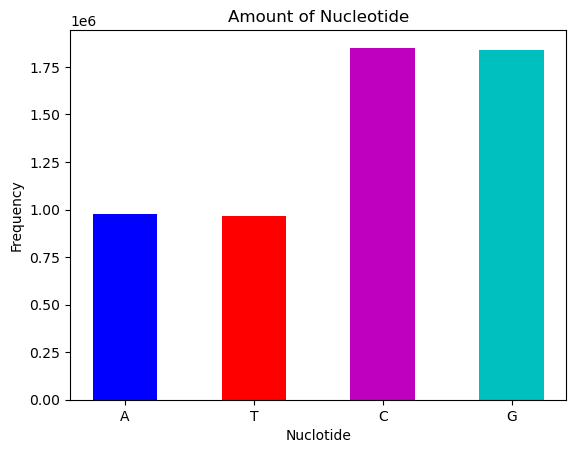

In [16]:
width = 0.5
color = ("b","r","m","c")
plt.bar(count_nuc.keys(), count_nuc.values() , width ,color = color)
plt.xlabel("Nuclotide")
plt.ylabel("Frequency")
plt.title("Amount of Nucleotide")

In [17]:
Ayg_mrna = Ayg99.transcribe()
Ayg_mrna

Seq('UUGACCAAUGACCCCGGUUCCGGUUUCGCCGCAGUGUGGAAUGCCGUCGUCGCU...UCG')

In [18]:
Ayg_aa = Ayg_mrna.translate()
Ayg_aa

Seq('LTNDPGSGFAAVWNAVVAELNGEPNTDGDAGTGTTLTSPLTPQQRAWLNLVQPL...DAS')

In [19]:
from collections import Counter

In [20]:
Counter(Ayg_aa)

Counter({'R': 270428,
         'A': 212983,
         'P': 175909,
         'G': 175286,
         'S': 164379,
         'L': 112609,
         'T': 109459,
         'V': 107559,
         'D': 69968,
         'Q': 60011,
         'H': 59680,
         'C': 55116,
         'I': 50080,
         'E': 47895,
         'W': 39042,
         '*': 34580,
         'N': 33476,
         'F': 32618,
         'K': 26058,
         'M': 22135,
         'Y': 17931})

Text(0.5, 1.0, 'Amino Acid Freaqunecy')

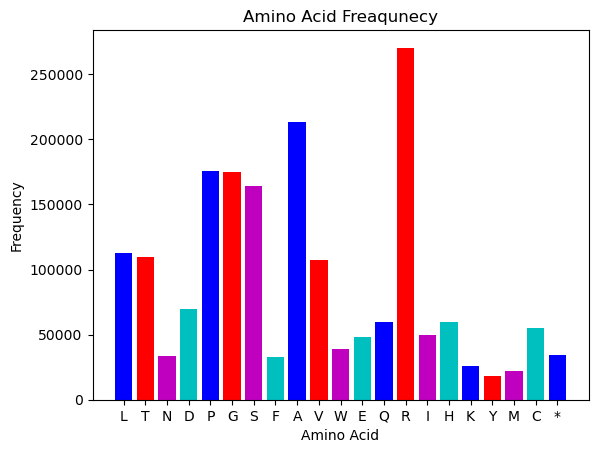

In [21]:
plt.bar(Counter(Ayg_aa).keys(), Counter(Ayg_aa).values(), color = color)
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Amino Acid Freaqunecy")

In [22]:
print(f" Ayg99 has {sum(Counter(Ayg_aa).values())} amino acids.")

 Ayg99 has 1877202 amino acids.


In [26]:
proteins = Ayg_aa.split("*")
print(f" Ayg99 has a {len(proteins)} proteins. ")
proteins[:10]

 Ayg99 has a 34581 proteins. 


[Seq('LTNDPGSGFAAVWNAVVAELNGEPNTDGDAGTGTTLTSPLTPQQRAWLNLVQPL...SKR'),
 Seq('SAASSSNFCKKLLSR'),
 Seq('SHELHDAGVCSPVHKRCRHSCNFRTGVHTARPIPNRPTQTTQPPAA'),
 Seq('STAPPVL'),
 Seq('LRQDPAVPRINTPYYCY'),
 Seq('DLFDDCSLKNSVGDIRYTASHRSACRLTCRH'),
 Seq('QRAFKFGLEALRLVFDCRCGRLGVTTRH'),
 Seq('RTKRSVPPAGGKVGSWIYGF'),
 Seq('THC'),
 Seq('VKGRNGRGYDTSWSHRLEISFGARVLRRCGVVGRKKLAHQACGAGAVGGVVDRL...LGF')]

In [24]:
longest_pro = sorted(proteins, key = len)[-1]
print(longest_pro)
print(len(longest_pro))

SIRNLANHEQEQLSMTTSGESADQQNDKLFRYLKKVAVELDEARARLREYEQRATEPVAVVGIGCRFPGGADGPEGLWDLVSQGRDAVTEFPNDRGWDTEGLFDPDPDAEGKTYTRWGAFVENATNFDAGFFGIPPSEVLAMDPQQRLMLEVSWEALEHAGIDPMSLRGSSTGVFTGIFAPSYGGKDVGALQGYGLTGSPVSVASGRVAYVLGLEGPALSVDTACSSSLVAIHWAMASLRSGECDMALAGGVTVMGLPSIFVGFSRQRGLAADGRCKAFAAAADGTGWGEGAGVLVLERLSDAQRNGHNVLAVVRGSAINQDGASNGLTAPNGLTQQRVIQAALANCGLTSADVDVVEAHGTATTLGDPIEAEALLATYGQGRPTDQPLWVGSIKSNMGHTQAAAGVAGVIKMVQAMRHGLMPASLHVDEPSKRVDWESGAVSVLAEARDWPDAGRPRRAGVSSFGISGTNAHVILEEAPAPEAVPDSESNKGEPSLPVVPWVISARSAEALTAQAGRLLAHVQADPQSNPVDIGFSLAGRSAFEHRAVVVGADRQQLLTGLATLADGAPGAGVVTGQAGSVGKTAVVFPGQGSQRIGMARELHDQLPVFAEAFDAVADELDRHLRIPLCEVMWGSDVALLDSTEFAQAALFAVEVALFAALQRWGLQPDFVMGHSVGELSAAYVAGVLTLVDAAMLVVARGRLMQALPAGGAMVAVAAAEDEVLPSLTDGVGIAAINAPKSVVISGAEAAVTAISDQFAQQGRRVHRLAVSHAFHSPLMEPMLEEFARIAAQVEAREPQIALVSNVTGELASADGGFGSAQYWVEHVRRAVRFADSARQLHTLGVTHFVEVGPGSGLTGSIEQSLAPAEAVVVSMLGKDRPEVASVLTAFGQLFSTGMSVDWPAVFAGSGATRVDLPTYAFQRRRFWEVPGADGPADATGLGLGGAEHALLGAVVERPDSGGVVLTGRLALADQPWLADHVIGGVVLFPGAGFVELAIR

In [25]:
with open("Ayg99_protesin_seq.fasta" ,"w") as file:
    file.write(f">Ayg99 Protein\n{proteins}")